In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('emotiondataset.tsv',delimiter=',',quoting=3,header=None,names=["review","emotion"])

In [30]:
dataset.fillna(method='ffill',inplace=True)

In [31]:
dataset.shape

(45309, 2)

#### Splitting the data


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.iloc[:,0].values,dataset.iloc[:,1].values,test_size=0.25,random_state=101)

In [33]:
print("x_train size is ",len(x_train))
print("x_test size is ",len(x_test))
print("y_train size is ",len(y_train))
print("y_test size is ",len(y_test))

x_train size is  33981
x_test size is  11328
y_train size is  33981
y_test size is  11328


In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33981,)
(33981,)
(11328,)
(11328,)


##### converting into expand dimension for encoding y_train and y_test

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33981,)
(33981,)
(11328,)
(11328,)


#### feature_extraction using CountVectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6000,stop_words='english',ngram_range=(1,1))
training_data=cv.fit_transform(x_train)
testing_data=cv.transform(x_test)

In [37]:
training_data.shape

(33981, 6000)

### Classifiaction

In [38]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)

In [39]:
classifier.fit(training_data,y_train)
pred_y=classifier.predict(testing_data)

### Prediction 

In [40]:
pred_y=classifier.predict(testing_data)

In [41]:
print(pred_y)

[1 1 3 ... 1 2 1]


### Confusion Matrix 

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,pred_y)

In [43]:
print(cm)

[[ 848  785  754   10    1]
 [ 569 2754  738   12    0]
 [ 611  823 2447   55    5]
 [  69   99  200  248    3]
 [   6   17   50    4  220]]


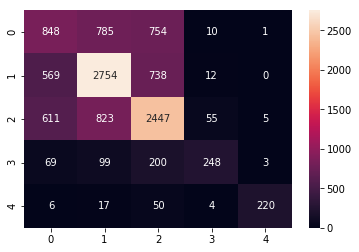

In [44]:
import seaborn as sb
sb.heatmap(cm,annot=True,fmt="d")

### Accuracy_score 

In [45]:
acc=accuracy_score(y_test,pred_y)
print(acc)

0.5753001412429378


### Classification Report 

In [46]:
cr = classification_report(y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.35      0.38      2398
           1       0.62      0.68      0.64      4073
           2       0.58      0.62      0.60      3941
           3       0.75      0.40      0.52       619
           4       0.96      0.74      0.84       297

   micro avg       0.58      0.58      0.58     11328
   macro avg       0.66      0.56      0.60     11328
weighted avg       0.58      0.58      0.57     11328



### Improving the model

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(classifier, param_grid, cv=5)
grid.fit(training_data, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best cross-validation score: 0.59
Best parameters:  {'C': 0.1}
